In [1]:
# importing librabries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings

In [2]:
data = pd.read_csv(r'C:\Users\kamlesh\Downloads\laptop\laptop_data.csv')

In [3]:
data.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
data.shape

(1303, 12)

In [5]:
# checking Null values
data.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [6]:
data.duplicated().sum()

0

In [7]:
# Dropping unnessary columns
data.drop(columns= ['Unnamed: 0'], inplace=True)

In [8]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


* As we can see Ram & Weights are in object, so let's do some preprocessing onit and convert into int.

In [10]:
data['Ram']=data['Ram'].str.replace('GB','')
data['Ram']=data['Ram'].astype('int64')

In [11]:
data['Weight']=data['Weight'].str.replace('kg','')
data['Weight']=data['Weight'].astype('float64')

In [12]:
data.dtypes

Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                   int64
Memory               object
Gpu                  object
OpSys                object
Weight              float64
Price               float64
dtype: object

#### Univerant Analysis

C:\Users\kamlesh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

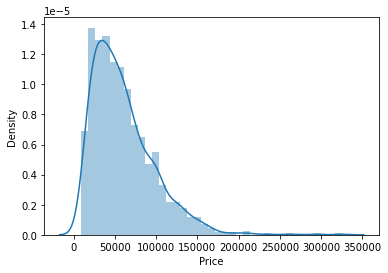

In [13]:
sns.distplot(data['Price'])

<AxesSubplot:>

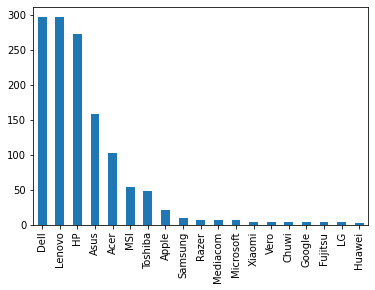

In [14]:
data['Company'].value_counts().plot(kind='bar')

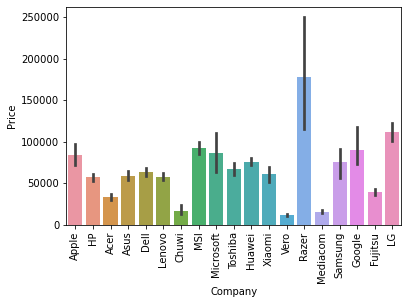

In [15]:
sns.barplot(x=data['Company'],y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:>

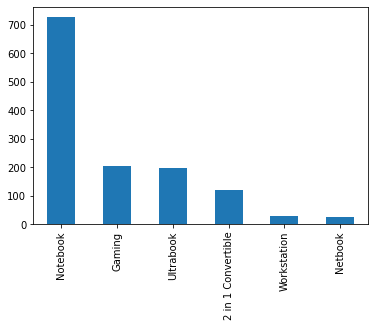

In [16]:
data['TypeName'].value_counts().plot(kind='bar')

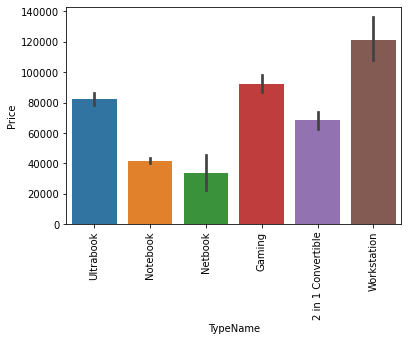

In [17]:
sns.barplot(x=data['TypeName'],y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

C:\Users\kamlesh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Inches', ylabel='Density'>

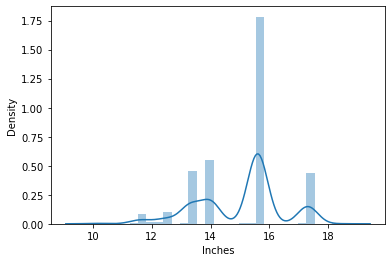

In [18]:
sns.distplot(data['Inches'])

<AxesSubplot:xlabel='Inches', ylabel='Price'>

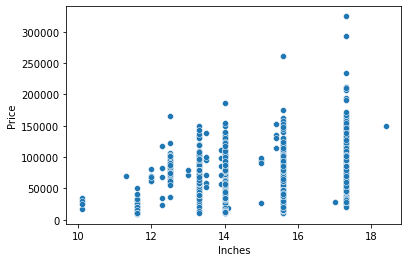

In [19]:
sns.scatterplot(x=data['Inches'],y=data['Price'])

In [20]:
data['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [21]:
# creating a new colums whether they are Touchscreen are not
data['Touchscreen']=data['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)

In [22]:
data.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
467,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,2TB HDD,AMD Radeon 530,Windows 10,2.02,40439.52,0
22,HP,Notebook,15.6,1366x768,AMD E-Series E2-9000e 1.5GHz,4,500GB HDD,AMD Radeon R2,No OS,1.86,13746.24,0
429,Mediacom,2 in 1 Convertible,11.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Celeron Dual Core N3350 1.1GHz,4,32GB SSD,Intel HD Graphics 500,Windows 10,1.16,15930.72,1
160,Asus,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4,1TB HDD,AMD Radeon R5 M420,Windows 10,2.03,21471.84,0
48,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4,256GB SSD,AMD Radeon R5 M430,Windows 10,2.30,34045.92,0


<AxesSubplot:>

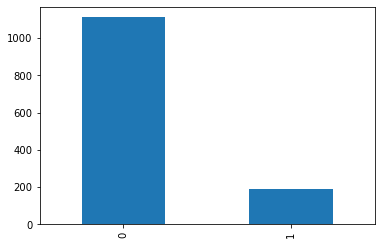

In [23]:
data['Touchscreen'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Touchscreen', ylabel='Price'>

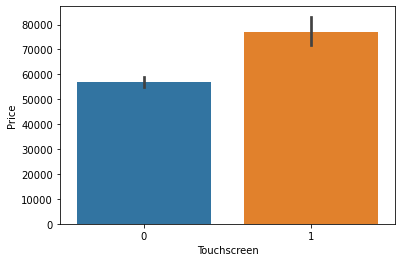

In [24]:
sns.barplot(x=data['Touchscreen'],y=data['Price'])

* Touchscreen laptops price are higer than normal laptops

In [25]:
data['IPS']=data['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0)

In [26]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


<AxesSubplot:>

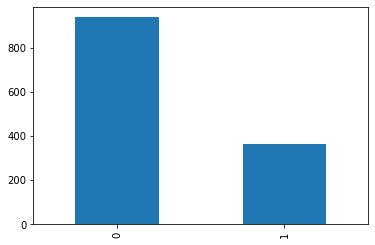

In [27]:
data['IPS'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='IPS', ylabel='Price'>

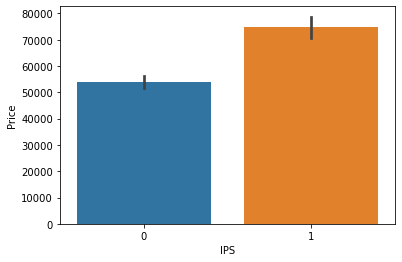

In [28]:
sns.barplot(x=data['IPS'],y=data['Price'])

In [29]:
new = data['ScreenResolution'].str.split('x',n=1, expand=True)

In [30]:
data['X_res'] = new[0]
data['Y_res'] = new[1]

In [31]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [32]:
data['X_res']=data['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d)').apply(lambda x:x[0])

Above we have separated ScreenResoulation as per Avalability of IPS, Touch Scrreen and Resoulations and while doing preprocessing we ave to apply Regrx Function for resoultion like 2560 x 1440

In [33]:
data.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int64  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  X_res             1303 non-null   object 
 14  Y_res             1303 non-null   object 
dtypes: float64(3), int64(3), object(9)
memory usage: 152.8+ KB


Here we need to change the Dtype from Object to int

In [35]:
data['X_res']=data['X_res'].astype('int64')
data['Y_res']=data['Y_res'].astype('int64')

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int64  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  X_res             1303 non-null   int64  
 14  Y_res             1303 non-null   int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 152.8+ KB


In [37]:
# finding correction wrt Price 
data.corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64

With the help of Inchecs, X_res, Y_res we are creating new column name of PPI  = PIXELS PER INCHES
* formula X_res ** 2 + y_res ** 2 / Inchces

In [38]:
data['ppi']=(((data['X_res']**2) + (data['Y_res']**2))** 0.5 / data['Inches']).astype('float64').round(3)

In [39]:
data.corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
ppi            0.473488
Name: Price, dtype: float64

as we can see PPI have strong corelation with than inches  So No need to keep  Inches,X_res, Y_res So will drop all 3 columsn and also we have extracted all data from ScreenResolution so will drop "Screen Resolution".

In [40]:
data.drop(columns=['ScreenResolution','Inches','X_res','Y_res'], inplace=True)

In [41]:
data.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.678
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.212
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.535
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983


In [42]:
# Lets check CPU Column
data['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

 As we can see there are 118 columns so here we need to do featute engineering, will divide this into 5 portion 
 * Intel I3
 * Intel I5
 * Intel I7
 * Intel Core, Pentium, Etc
 * AMD
 

In [43]:
data['Cpu_Name']=data['Cpu'].apply(lambda x:" ".join(x.split()[0:3])) #BY USING WE ARE  AGAINTING INTO LIST TO STRING

In [44]:
def fetch_processor(text):
    if text == "Intel Core i3" or text =="Intel Core i5" or text =="Intel Core i7":
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [45]:
data['Cpu_brand'] = data['Cpu_Name'].apply(fetch_processor)

In [46]:
data.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu_Name,Cpu_brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.678,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.212,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.535,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983,Intel Core i5,Intel Core i5


<AxesSubplot:>

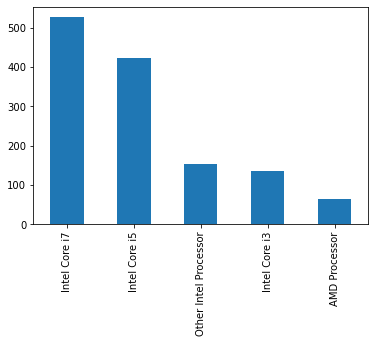

In [47]:
data['Cpu_brand'].value_counts().plot(kind='bar')

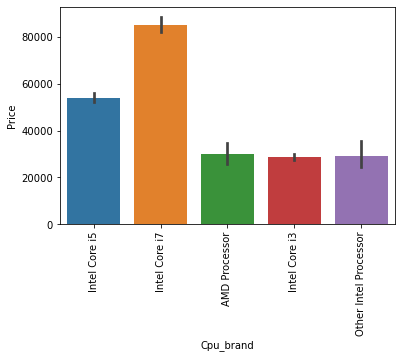

In [48]:
sns.barplot(x=data['Cpu_brand'],y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

We will drop Cpu & Cpu_Name columns

In [49]:
data.drop(columns=['Cpu','Cpu_Name'], inplace=True)

In [50]:
data.head(1)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu_brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983,Intel Core i5


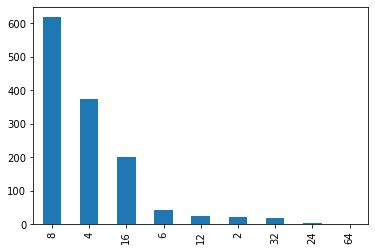

In [51]:
data['Ram'].value_counts().plot(kind='bar')
plt.xticks(rotation=90)
plt.show()

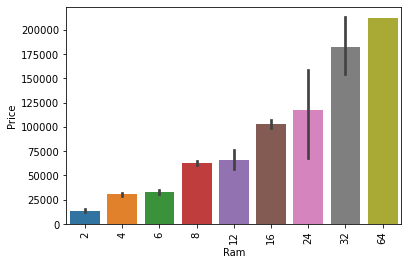

In [52]:
sns.barplot(x=data['Ram'],y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

"Ram" is also main aspect as Ram increase Price of laptop is alos increases

In [53]:
data['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

Here will make 4 columns
* SSD
* HDD
* flash Storage
* Hybrid

In [54]:
data['Memory']=data['Memory'].astype(str).replace('\.0','', regex=True)
data["Memory"]=data["Memory"].str.replace('GB','')
data["Memory"]=data["Memory"].str.replace('TB','000')
new=data["Memory"].str.split("+",n=1,expand=True)

In [55]:
data["first"]=new[0]
data["first"]=data["first"].str.strip()

data["second"]=new[1]

In [56]:
data["Layer1HDD"]=data['first'].apply(lambda x: 1 if 'HDD' in x else 0)
data["Layer1SSD"]=data['first'].apply(lambda x: 1 if 'SSD' in x else 0)
data["Layer1Hybrid"]=data['first'].apply(lambda x: 1 if 'Hybrid' in x else 0)
data["Layer1Flash_storage"]=data['first'].apply(lambda x: 1 if 'Flash Storage' in x else 0)

In [57]:
data['first']=data['first'].str.replace(r'\D','')

C:\Users\kamlesh\AppData\Local\Temp/ipykernel_14388/3185552378.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['first']=data['first'].str.replace(r'\D','')


In [58]:
data["second"].fillna("0", inplace=True)

In [59]:
data["Layer2HDD"] = data["second"].apply(lambda x: 1 if 'HDD' in x else 0)
data["Layer2SSD"] = data["second"].apply(lambda x: 1 if 'SSD' in x else 0)
data["Layer2Hybrid"] = data["second"].apply(lambda x: 1 if 'Hybrid' in x else 0)
data["Layer2Flash_storage"] = data["second"].apply(lambda x: 1 if 'Flash Storage' in x else 0)

In [60]:
data["second"]=data["second"].str.replace(r'\D','')

C:\Users\kamlesh\AppData\Local\Temp/ipykernel_14388/194055977.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data["second"]=data["second"].str.replace(r'\D','')


In [61]:
data["first"]=data["first"].astype(int)
data["second"]=data["second"].astype(int)

In [62]:
data["HDD"] = (data["first"]*data["Layer1HDD"] + data["second"]*data["Layer2HDD"])
data["SSD"] = (data["first"]*data["Layer1SSD"] + data["second"]*data["Layer2SSD"])
data["Hybrid"] = (data["first"]*data["Layer1Hybrid"] + data["second"]*data["Layer2Hybrid"])
data["Flash_Storage"] = (data["first"]*data["Layer1Flash_storage"] + data["second"]*data["Layer2Flash_storage"])

In [63]:
data.drop(columns=['first','second','Layer1HDD','Layer1SSD','Layer1Hybrid','Layer1Flash_storage','Layer2HDD','Layer2SSD','Layer2Hybrid','Layer2Flash_storage'],inplace=True)

In [64]:
data.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu_brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.678,Intel Core i5,0,0,0,128
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.212,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.535,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983,Intel Core i5,0,256,0,0


In [65]:
data.drop(columns=['Memory'], inplace=True)

In [66]:
data.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu_brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.678,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.212,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.535,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983,Intel Core i5,0,256,0,0


In [67]:
 data.corr()['Price']

Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
IPS              0.252208
ppi              0.473488
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

by fiding the corr() for HDD, SSD, Hybrid & Flash Storage it seen like Hybrid and Flash Storage have not stong corr wrt Price on the other hand SSD having strong Corr With Price and After SSD, HDD Hving Corr with Price, so will drop Hybrid and Flash Storage

In [68]:
data.drop(columns=['Hybrid','Flash_Storage'], inplace=True)

In [69]:
data.head(2)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu_brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.678,Intel Core i5,0,0


In [70]:
data['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [71]:
# extracting the company first name e.g intel, AMD, Nvidia

data['Gpu_brand']=data['Gpu'].apply(lambda x: x.split()[0])

In [72]:
data['Gpu_brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu_brand, dtype: int64

As we can there is only one ARM graphic Card used and it's not providing effetive output

In [73]:
data=data[data['Gpu_brand'] != 'ARM']

In [74]:
data['Gpu_brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
Name: Gpu_brand, dtype: int64

<AxesSubplot:xlabel='Gpu_brand', ylabel='Price'>

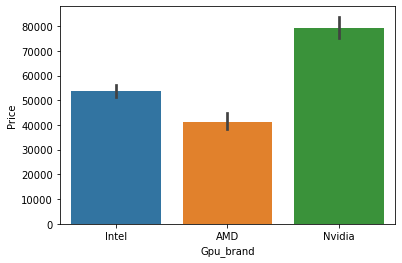

In [75]:
sns.barplot(x=data['Gpu_brand'],y=data['Price'])

In [76]:
data.drop(columns=['Gpu'], inplace=True)

In [77]:
data.head(2)

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu_brand,HDD,SSD,Gpu_brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.678,Intel Core i5,0,0,Intel


In [78]:
data['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'macOS'),
  Text(1, 0, 'No OS'),
  Text(2, 0, 'Windows 10'),
  Text(3, 0, 'Mac OS X'),
  Text(4, 0, 'Linux'),
  Text(5, 0, 'Android'),
  Text(6, 0, 'Windows 10 S'),
  Text(7, 0, 'Chrome OS'),
  Text(8, 0, 'Windows 7')])

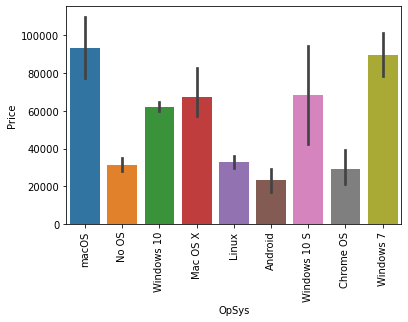

In [79]:
sns.barplot(x=data['OpSys'],y=data['Price'])
plt.xticks(rotation='vertical')

In [80]:
def cat_os(inp):
    if inp=='Windows 10' or inp =='Windows 10 S' or inp == 'Windows 7':
        return 'Windows'
    elif inp == 'Mac OS X' or inp == 'macOS':
        return 'Mac'
    else:
        return 'Others/No OS/Android/Linux'
    

In [81]:
data['os']=data['OpSys'].apply(cat_os)

(array([0, 1, 2]),
 [Text(0, 0, 'Mac'),
  Text(1, 0, 'Others/No OS/Android/Linux'),
  Text(2, 0, 'Windows')])

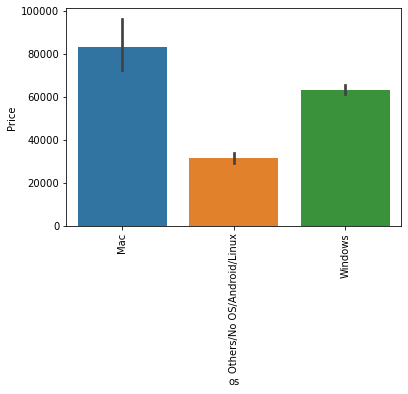

In [82]:
sns.barplot(x=data['os'],y=data['Price'])
plt.xticks(rotation='90')

In [83]:
data.drop(columns=['OpSys'], inplace=True)

C:\Users\kamlesh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight', ylabel='Density'>

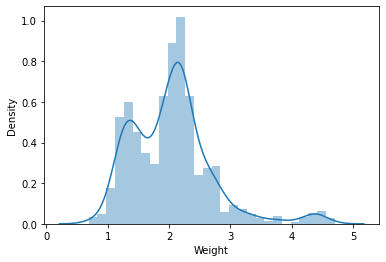

In [85]:
sns.distplot(data['Weight'])

<AxesSubplot:xlabel='Weight', ylabel='Price'>

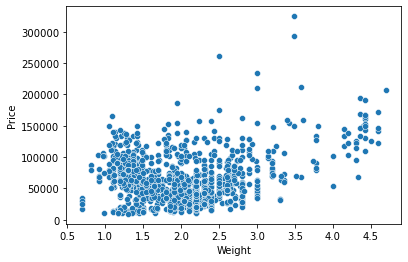

In [87]:
sns.scatterplot(x=data['Weight'], y=data['Price'])

<AxesSubplot:>

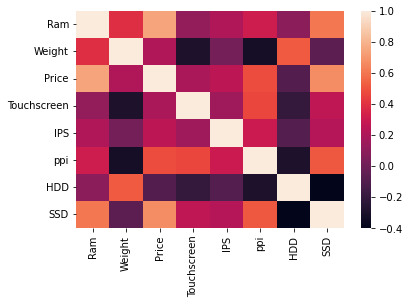

In [90]:
sns.heatmap(data.corr())

C:\Users\kamlesh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

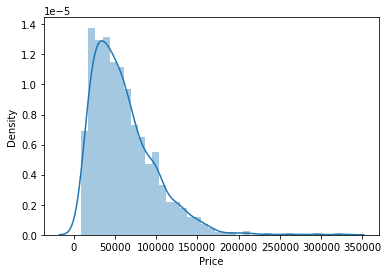

In [91]:
sns.distplot(data['Price'])

* Price columns skewed, so by applying log transformation we can remove the skewiness

C:\Users\kamlesh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

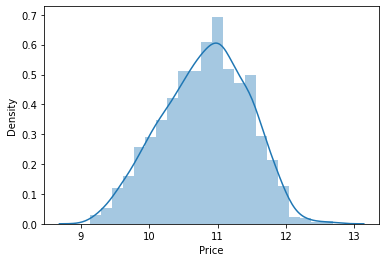

In [92]:
sns.distplot(np.log(data['Price']))

In [94]:
X = data.drop(columns=['Price'])
y = np.log(data['Price'])

In [95]:
X

,Company,TypeName,Ram,Weight,Touchscreen,IPS,ppi,Cpu_brand,HDD,SSD,Gpu_brand,os
0,Apple,Ultrabook,8,1.37,0,1,226.983,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.678,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.212,Intel Core i5,0,256,Intel,Others/No OS/Android/Linux
3,Apple,Ultrabook,16,1.83,0,1,220.535,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.351,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.054,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,0,111.935,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,0,0,100.455,Intel Core i7,1000,0,AMD,Windows


In [96]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

In [97]:
from sklearn.model_selection import train_test_split

In [99]:
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.15, random_state=2)

In [ ]:
!pip install 

In [112]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_absolute_error

In [111]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
#from xgboost import XGBRegressor

### Linear Regression

In [115]:
# Creating Pipeline and transforming columns
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False, drop='first'),[0,1,7,10,11])],remainder='passthrough')

step2 =LinearRegression()

pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train, y_train)

y_pred=pipe.predict(X_test)

print("R2_Score:%.2f" % r2_score(y_test,y_pred))
print("mean_absolute_error:%.2f" % mean_absolute_error(y_test,y_pred))


R2_Score:0.81
mean_absolute_error:0.21


#### Ridge Regression

In [116]:
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False, drop='first'),[0,1,7,10,11])],remainder='passthrough')

step2 =Ridge(alpha=10)

pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train, y_train)

y_pred=pipe.predict(X_test)

print("R2_Score:%.2f" % r2_score(y_test,y_pred))
print("mean_absolute_error:%.2f" % mean_absolute_error(y_test,y_pred))

R2_Score:0.81
mean_absolute_error:0.21


#### Lasso Regression

In [120]:
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False, drop='first'),[0,1,7,10,11])],remainder='passthrough')

step2 =Lasso(alpha=0.001)

pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train, y_train)

y_pred=pipe.predict(X_test)

print("R2_Score:%.2f" % r2_score(y_test,y_pred))
print("mean_absolute_error:%.2f" % mean_absolute_error(y_test,y_pred))

R2_Score:0.81
mean_absolute_error:0.21


#### KNN

In [128]:
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False, drop='first'),[0,1,7,10,11])],remainder='passthrough')

step2 =KNeighborsRegressor(n_neighbors=3)

pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train, y_train)

y_pred=pipe.predict(X_test)

print("R2_Score:%.2f" % r2_score(y_test,y_pred))
print("mean_absolute_error:%.2f" % mean_absolute_error(y_test,y_pred))

R2_Score:0.80
mean_absolute_error:0.19


#### Decision Tree

In [137]:
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False, drop='first'),[0,1,7,10,11])],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8, random_state=2)

pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train, y_train)

y_pred=pipe.predict(X_test)

print("R2_Score:%.2f" % r2_score(y_test,y_pred))
print("mean_absolute_error:%.2f" % mean_absolute_error(y_test,y_pred))

R2_Score:0.84
mean_absolute_error:0.18


### SVM

In [143]:
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False, drop='first'),[0,1,7,10,11])],remainder='passthrough')

step2 =SVR(kernel='rbf',C=1000,epsilon=0.1)

pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train, y_train)

y_pred=pipe.predict(X_test)

print("R2_Score:%.2f" % r2_score(y_test,y_pred))
print("mean_absolute_error:%.2f" % mean_absolute_error(y_test,y_pred))

R2_Score:0.77
mean_absolute_error:0.23


### RandomForest

In [169]:
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False, drop='first'),[0,1,7,10,11])],remainder='passthrough')

step2 =RandomForestRegressor(n_estimators=100,
                            random_state=3,
                            max_samples=0.5,
                            max_features=0.75,
                            max_depth=15)

pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train, y_train)

y_pred=pipe.predict(X_test)

print("R2_Score:%.2f" % r2_score(y_test,y_pred))
print("mean_absolute_error:%.2f" % mean_absolute_error(y_test,y_pred))

R2_Score:0.89
mean_absolute_error:0.16


#### Extra Tree

In [156]:
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False, drop='first'),[0,1,7,10,11])],remainder='passthrough')

step2 = ExtraTreesRegressor(n_estimators=100,
                            random_state=3,
                            max_samples=0.5,
                            max_features=0.75,
                            max_depth=15)

pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train, y_train)

y_pred=pipe.predict(X_test)

print("R2_Score:%.2f" % r2_score(y_test,y_pred))
print("mean_absolute_error:%.2f" % mean_absolute_error(y_test,y_pred))

R2_Score:0.88
mean_absolute_error:0.16


#### AdaBoost

In [157]:
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False, drop='first'),[0,1,7,10,11])],remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train, y_train)

y_pred=pipe.predict(X_test)

print("R2_Score:%.2f" % r2_score(y_test,y_pred))
print("mean_absolute_error:%.2f" % mean_absolute_error(y_test,y_pred))

R2_Score:0.78
mean_absolute_error:0.24


### Gradient Boosting

In [160]:
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False, drop='first'),[0,1,7,10,11])],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train, y_train)

y_pred=pipe.predict(X_test)

print("R2_Score:%.2f" % r2_score(y_test,y_pred))
print("mean_absolute_error:%.2f" % mean_absolute_error(y_test,y_pred))

R2_Score:0.88
mean_absolute_error:0.16


In [163]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [164]:
from xgboost.sklearn import XGBRegressor

In [165]:
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False, drop='first'),[0,1,7,10,11])],remainder='passthrough')

step2 = XGBRegressor(n_estimators=45, max_depth=5, learning_rate=0.5)

pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train, y_train)

y_pred=pipe.predict(X_test)

print("R2_Score:%.2f" % r2_score(y_test,y_pred))
print("mean_absolute_error:%.2f" % mean_absolute_error(y_test,y_pred))

R2_Score:0.88
mean_absolute_error:0.16


#### Voting Regressor

In [167]:
from sklearn.ensemble import VotingRegressor, StackingRegressor

step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False, drop='first'),[0,1,7,10,11])],remainder='passthrough')

rf = RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
xgb = XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)
et = ExtraTreesRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=10)

step2 = VotingRegressor([('rf',rf),('gbdt',gbdt),('xgb',xgb),('et',et)], weights=[5,1,1,1])

pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train, y_train)

y_pred=pipe.predict(X_test)

print("R2_Score:%.2f" % r2_score(y_test,y_pred))
print("mean_absolute_error:%.2f" % mean_absolute_error(y_test,y_pred))

R2_Score:0.89
mean_absolute_error:0.16


#### Stacking

In [168]:
 from sklearn.ensemble import VotingRegressor, StackingRegressor

step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False, drop='first'),[0,1,7,10,11])],remainder='passthrough')

estimators = [
    ('rf', RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)),
    ('gbdt',GradientBoostingRegressor(n_estimators=100,max_features=0.5)),
    ('xgb', XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5))
]

step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))

pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train, y_train)

y_pred=pipe.predict(X_test)

print("R2_Score:%.2f" % r2_score(y_test,y_pred))
print("mean_absolute_error:%.2f" % mean_absolute_error(y_test,y_pred))

R2_Score:0.88
mean_absolute_error:0.17


#### Exporting the Model

In [170]:
import pickle

In [171]:
pickle.dump(data, open('data.pkl','wb'))
pickle.dump(pipe, open('pipe.pkl','wb'))